<a href="https://colab.research.google.com/github/gustavowcruz/projeto-ml-vgg/blob/main/vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar dependências
!pip install yt-dlp librosa torch torchvision torchaudio numpy matplotlib resampy

!git clone https://github.com/harritaylor/torchvggish.git
%cd torchvggish

import sys
sys.path.append('/content/torchvggish')

import torchvggish
print("TorchVGGish carregado com sucesso!")


!pip install torch numpy resampy soundfile




import os
import yt_dlp
import librosa
import librosa.display
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from torchaudio.transforms import MelSpectrogram

fatal: destination path 'torchvggish' already exists and is not an empty directory.
/content/torchvggish
TorchVGGish carregado com sucesso!


In [ ]:
!pip install torchvggish

[youtube] Extracting URL: https://www.youtube.com/watch?v=ocpDEOXABWg
[youtube] ocpDEOXABWg: Downloading webpage
[youtube] ocpDEOXABWg: Downloading tv client config
[youtube] ocpDEOXABWg: Downloading player 73381ccc-main
[youtube] ocpDEOXABWg: Downloading tv player API JSON
[youtube] ocpDEOXABWg: Downloading ios player API JSON
[youtube] ocpDEOXABWg: Downloading m3u8 information
[info] ocpDEOXABWg: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of    3.58MiB in 00:00:00 at 14.04MiB/s  
[ExtractAudio] Destination: audio.wav
Deleting original file audio.webm (pass -k to keep)


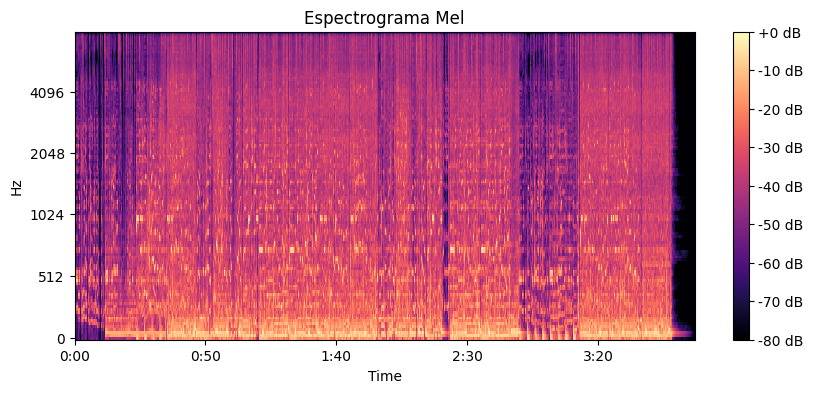

Using cache found in /root/.cache/torch/hub/harritaylor_torchvggish_master
/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


AttributeError: 

In [ ]:
from torchvggish import vggish_input

# Função para baixar áudio do YouTube
def baixar_audio_youtube(url, output_path="audio.wav"):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': 'audio.%(ext)s',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

    return "audio.wav"  # Retorna o caminho do arquivo baixado

# URL do vídeo (exemplo, altere para o seu dataset)
url = "https://www.youtube.com/watch?v=ocpDEOXABWg"
caminho_wav = baixar_audio_youtube(url)

# Carregar áudio
waveform, sample_rate = librosa.load(caminho_wav, sr=16000)

# Gerar espectrograma
mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plotar espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Mel')
plt.show()

# Carregar modelo VGG Sound pré-treinado
modelo = torch.hub.load('harritaylor/torchvggish', 'vggish')
modelo.eval()

# Converter áudio para entrada do modelo
transform = MelSpectrogram(sample_rate=sample_rate, n_mels=128)
wav_tensor = torch.tensor(waveform).unsqueeze(0)
mel_tensor = transform(wav_tensor)

# Classificar gênero
with torch.no_grad():
    output = modelo(mel_tensor)
    genero_predito = torch.argmax(output, dim=1)

print(f"Gênero musical previsto: {genero_predito.item()}")


[youtube] Extracting URL: https://www.youtube.com/watch?v=ocpDEOXABWg
[youtube] ocpDEOXABWg: Downloading webpage
[youtube] ocpDEOXABWg: Downloading tv client config
[youtube] ocpDEOXABWg: Downloading player 73381ccc-main
[youtube] ocpDEOXABWg: Downloading tv player API JSON
[youtube] ocpDEOXABWg: Downloading ios player API JSON
[youtube] ocpDEOXABWg: Downloading m3u8 information
[info] ocpDEOXABWg: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of    3.58MiB in 00:00:00 at 39.16MiB/s  
[ExtractAudio] Destination: audio.wav
Deleting original file audio.webm (pass -k to keep)


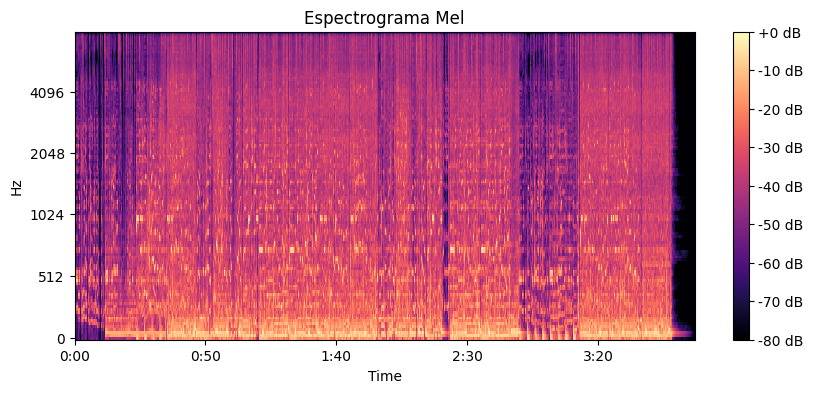

NameError: name 'vggish' is not defined

In [ ]:
import torch
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import yt_dlp
import torch.nn.functional as F
import torchvggish
from torchaudio.transforms import MelSpectrogram

# Função para baixar áudio do YouTube
def baixar_audio_youtube(url, output_path="audio.wav"):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': 'audio.%(ext)s',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

    return "audio.wav"  # Retorna o caminho do arquivo baixado

# URL do vídeo (exemplo, altere para o seu dataset)
url = "https://www.youtube.com/watch?v=ocpDEOXABWg"
caminho_wav = baixar_audio_youtube(url)

# Carregar áudio
waveform, sample_rate = librosa.load(caminho_wav, sr=16000)

# Gerar espectrograma
mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plotar espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Mel')
plt.show()

# Carregar modelo VGG Sound pré-treinado
modelo = vggish.VGGish('harritaylor/torchvggish', 'vggish')
modelo.eval()

# Converter áudio para entrada do modelo
transform = MelSpectrogram(sample_rate=sample_rate, n_mels=128)
wav_tensor = torch.tensor(waveform).unsqueeze(0)
mel_tensor = transform(wav_tensor)

# Ajustar dimensão do mel_tensor para (1, 128, 96)
mel_tensor = mel_tensor[:, :, :96] if mel_tensor.shape[2] > 96 else mel_tensor
mel_tensor = mel_tensor.to(torch.float32)  # Garantir que está no formato correto

# Classificar gênero
with torch.no_grad():
    output = modelo(mel_tensor)
    genero_predito = torch.argmax(output, dim=1)

print(f"Gênero musical previsto: {genero_predito.item()}")


In [ ]:
print(vggish)

NameError: name 'vggish' is not defined

[youtube] Extracting URL: https://www.youtube.com/watch?v=ocpDEOXABWg
[youtube] ocpDEOXABWg: Downloading webpage
[youtube] ocpDEOXABWg: Downloading tv client config
[youtube] ocpDEOXABWg: Downloading player 73381ccc-main
[youtube] ocpDEOXABWg: Downloading tv player API JSON
[youtube] ocpDEOXABWg: Downloading ios player API JSON
[youtube] ocpDEOXABWg: Downloading m3u8 information
[info] ocpDEOXABWg: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of    3.58MiB in 00:00:00 at 68.82MiB/s  
[ExtractAudio] Destination: audio.wav
Deleting original file audio.webm (pass -k to keep)


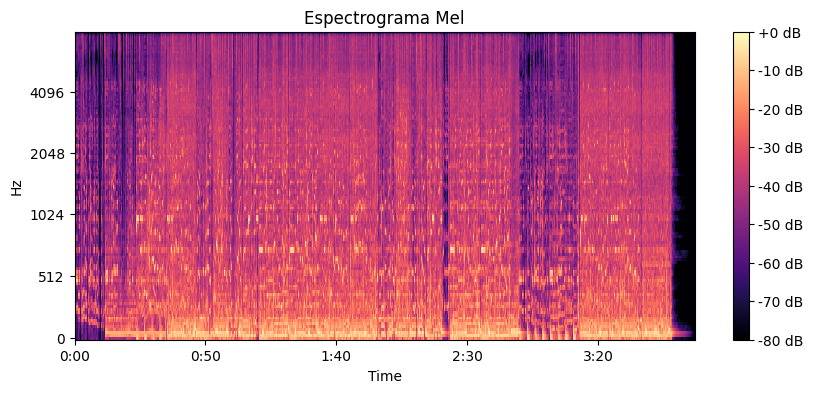

Downloading: "https://github.com/harritaylor/torchvggish/releases/download/v0.1/vggish_pca_params-970ea276.pth" to /root/.cache/torch/hub/checkpoints/vggish_pca_params-970ea276.pth
100%|██████████| 177k/177k [00:00<00:00, 3.88MB/s]
Downloading: "https://github.com/harritaylor/torchvggish/releases/download/v0.1/vggish-10086976.pth" to /root/.cache/torch/hub/checkpoints/vggish-10086976.pth
100%|██████████| 275M/275M [00:02<00:00, 112MB/s]
/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

In [ ]:
import torch
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import yt_dlp
import torch.nn.functional as F
import sys
import os

# 🔹 Clonar o repositório TorchVGGish (se ainda não estiver presente)
if not os.path.exists("torchvggish"):
    !git clone https://github.com/harritaylor/torchvggish.git

# 🔹 Adicionar o repositório ao path
sys.path.append("torchvggish")

# 🔹 Instalar dependências
!pip install -q torch numpy resampy soundfile six

# Agora podemos importar o modelo corretamente
from torchvggish import vggish
from torchaudio.transforms import MelSpectrogram

# 🔹 Função para baixar áudio do YouTube
def baixar_audio_youtube(url, output_path="audio.wav"):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': 'audio.%(ext)s',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

    return "audio.wav"  # Retorna o caminho do arquivo baixado

# 🔹 URL do vídeo (exemplo, altere para o seu dataset)
url = "https://www.youtube.com/watch?v=ocpDEOXABWg"
caminho_wav = baixar_audio_youtube(url)

# 🔹 Carregar áudio
waveform, sample_rate = librosa.load(caminho_wav, sr=16000)

# 🔹 Gerar espectrograma
mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

# 🔹 Plotar espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Mel')
plt.show()

# 🔹 Carregar modelo VGG Sound pré-treinado
modelo = vggish()
modelo.eval()

# 🔹 Converter áudio para entrada do modelo
transform = MelSpectrogram(sample_rate=sample_rate, n_mels=128)
wav_tensor = torch.tensor(waveform).unsqueeze(0)
mel_tensor = transform(wav_tensor)

# 🔹 Ajustar dimensão do mel_tensor para (1, 128, 96)
mel_tensor = mel_tensor[:, :, :96] if mel_tensor.shape[2] > 96 else mel_tensor
mel_tensor = mel_tensor.to(torch.float32)  # Garantir que está no formato correto

# 🔹 Classificar gênero
with torch.no_grad():
    output = modelo(mel_tensor)
    genero_predito = torch.argmax(output, dim=1)

print(f"Gênero musical previsto: {genero_predito.item()}")


In [ ]:
import sys
print(sys.path)


['/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/root/.ipython', '/content/torchvggish', 'torchvggish']


In [ ]:
!pip show torchvggish


Name: torchvggish
Version: 0.2
Summary: A Pytorch port of Tensorflow's VGGish embedding model.
Home-page: https://github.com/harritaylor/torchvggish
Author: Harri Taylor
Author-email: taylorh23@cardiff.ac.uk
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, resampy, torch
Required-by: 


[youtube] Extracting URL: https://www.youtube.com/watch?v=ocpDEOXABWg
[youtube] ocpDEOXABWg: Downloading webpage
[youtube] ocpDEOXABWg: Downloading tv client config
[youtube] ocpDEOXABWg: Downloading player 73381ccc-main
[youtube] ocpDEOXABWg: Downloading tv player API JSON
[youtube] ocpDEOXABWg: Downloading ios player API JSON
[youtube] ocpDEOXABWg: Downloading m3u8 information
[info] ocpDEOXABWg: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of    3.58MiB in 00:00:00 at 62.71MiB/s  
[ExtractAudio] Destination: audio.wav
Deleting original file audio.webm (pass -k to keep)


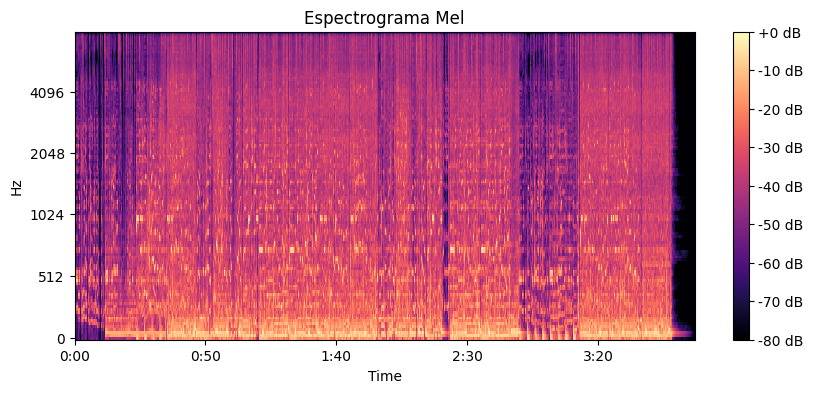

/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Formato do mel_tensor: torch.Size([1, 1, 128, 96])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x24576 and 12288x4096)

In [ ]:
import torch
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import yt_dlp
import torch.nn.functional as F
import torchvggish
from torchaudio.transforms import MelSpectrogram

# Função para baixar áudio do YouTube
def baixar_audio_youtube(url, output_path="audio.wav"):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': 'audio.%(ext)s',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

    return "audio.wav"  # Retorna o caminho do arquivo baixado

# URL do vídeo (exemplo, altere para o seu dataset)
url = "https://www.youtube.com/watch?v=ocpDEOXABWg"
caminho_wav = baixar_audio_youtube(url)

# Carregar áudio
waveform, sample_rate = librosa.load(caminho_wav, sr=16000)

# Gerar espectrograma
mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plotar espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Mel')
plt.show()

# Carregar modelo VGG Sound pré-treinado
modelo = torchvggish.vggish()
modelo.eval()

# Converter áudio para entrada do modelo
transform = MelSpectrogram(sample_rate=sample_rate, n_mels=128)
wav_tensor = torch.tensor(waveform).unsqueeze(0)
mel_tensor = transform(wav_tensor)

# Ajustar dimensão do mel_tensor para (1, 1, 128, 96)
mel_tensor = mel_tensor[:, :, :96] if mel_tensor.shape[2] > 96 else mel_tensor
mel_tensor = mel_tensor.unsqueeze(1)  # Adiciona a dimensão do canal
mel_tensor = mel_tensor.to(torch.float32)  # Garantir que está no formato correto

# Verificar dimensões antes de passar para o modelo
print(f"Formato do mel_tensor: {mel_tensor.shape}")

# Classificar gênero
with torch.no_grad():
    output = modelo(mel_tensor)
    genero_predito = torch.argmax(output, dim=1)

print(f"Gênero musical previsto: {genero_predito.item()}")


In [ ]:
import torch
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import yt_dlp
import torchvggish

# Função para baixar áudio do YouTube
def baixar_audio_youtube(url, output_path="audio.wav"):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': 'audio.%(ext)s',
        'postprocessors': [{'key': 'FFmpegExtractAudio', 'preferredcodec': 'wav', 'preferredquality': '192'}],
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

    return "audio.wav"

# URL do vídeo
url = "https://www.youtube.com/watch?v=ocpDEOXABWg"
caminho_wav = baixar_audio_youtube(url)

# Carregar áudio
waveform, sample_rate = librosa.load(caminho_wav, sr=16000)

# Gerar espectrograma no formato esperado pelo VGGish
mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=64, fmax=8000, hop_length=160)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

# Transpor para (96, 64) para alinhar com a entrada do VGGish
mel_db = mel_db[:, :96]  # Garantir que tem exatamente 96 frames

# Normalizar entre -4 e +4
mel_db = (mel_db - mel_db.mean()) / mel_db.std()
mel_db = np.clip(mel_db, -4, 4)

# Converter para tensor PyTorch no formato correto (1, 1, 96, 64)
mel_tensor = torch.tensor(mel_db, dtype=torch.float32)
mel_tensor = mel_tensor.unsqueeze(0).unsqueeze(0)  # (1, 1, 64, 96)
mel_tensor = mel_tensor.permute(0, 1, 3, 2)  # Reordenar para (1, 1, 96, 64)

print(f"Formato do mel_tensor: {mel_tensor.shape}")  # Deve ser (1, 1, 96, 64)

# Carregar modelo VGGish pré-treinado
modelo = torchvggish.vggish()
modelo.eval()

# Classificar gênero
with torch.no_grad():
    output = modelo(mel_tensor)
    genero_predito = torch.argmax(output, dim=1)

print(f"Gênero musical previsto: {genero_predito.item()}")


[youtube] Extracting URL: https://www.youtube.com/watch?v=ocpDEOXABWg
[youtube] ocpDEOXABWg: Downloading webpage
[youtube] ocpDEOXABWg: Downloading tv client config
[youtube] ocpDEOXABWg: Downloading player 73381ccc-main
[youtube] ocpDEOXABWg: Downloading tv player API JSON
[youtube] ocpDEOXABWg: Downloading ios player API JSON
[youtube] ocpDEOXABWg: Downloading m3u8 information
[info] ocpDEOXABWg: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of    3.58MiB in 00:00:00 at 40.51MiB/s  
[ExtractAudio] Destination: audio.wav
Deleting original file audio.webm (pass -k to keep)
Formato do mel_tensor: torch.Size([1, 1, 96, 64])


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
import torch
import librosa
import numpy as np
import yt_dlp
import torchvggish
import torch.nn as nn

# Função para baixar áudio do YouTube
def baixar_audio_youtube(url, output_path="audio.wav"):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': 'audio.%(ext)s',
        'postprocessors': [{'key': 'FFmpegExtractAudio', 'preferredcodec': 'wav', 'preferredquality': '192'}],
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

    return "audio.wav"

# URL do vídeo
url = "https://www.youtube.com/watch?v=ocpDEOXABWg"
caminho_wav = baixar_audio_youtube(url)

# Carregar áudio
waveform, sample_rate = librosa.load(caminho_wav, sr=16000)

# Gerar espectrograma no formato esperado pelo VGGish
mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=64, fmax=8000, hop_length=160)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

# Transpor para (96, 64) para alinhar com a entrada do VGGish
mel_db = mel_db[:, :96]  # Garantir que tem exatamente 96 frames

# Normalizar entre -4 e +4
mel_db = (mel_db - mel_db.mean()) / mel_db.std()
mel_db = np.clip(mel_db, -4, 4)

# Converter para tensor PyTorch no formato correto (1, 1, 96, 64)
mel_tensor = torch.tensor(mel_db, dtype=torch.float32)
mel_tensor = mel_tensor.unsqueeze(0).unsqueeze(0)  # (1, 1, 64, 96)
mel_tensor = mel_tensor.permute(0, 1, 3, 2)  # Reordenar para (1, 1, 96, 64)

print(f"Formato do mel_tensor antes do modelo: {mel_tensor.shape}")

# Carregar modelo VGGish pré-treinado
modelo = torchvggish.vggish()
modelo.eval()

# Passar pelo modelo
with torch.no_grad():
    output = modelo(mel_tensor)
    print(f"Formato do output do VGGish: {output.shape}")

# Se a saída for um vetor de características (128), adicionamos uma camada de classificação
if output.shape == torch.Size([128]):
    classificador = nn.Sequential(
        nn.Linear(128, 10),  # Supondo 10 gêneros musicais
        nn.Softmax(dim=1)
    )

    with torch.no_grad():
        output = classificador(output.unsqueeze(0))  # Adicionar dimensão de batch
        genero_predito = torch.argmax(output, dim=1).item()

    print(f"Gênero musical previsto: {genero_predito}")
else:
    print("Erro: O modelo não retornou a saída esperada.")


[youtube] Extracting URL: https://www.youtube.com/watch?v=ocpDEOXABWg
[youtube] ocpDEOXABWg: Downloading webpage
[youtube] ocpDEOXABWg: Downloading tv client config
[youtube] ocpDEOXABWg: Downloading player 73381ccc-main
[youtube] ocpDEOXABWg: Downloading tv player API JSON
[youtube] ocpDEOXABWg: Downloading ios player API JSON
[youtube] ocpDEOXABWg: Downloading m3u8 information
[info] ocpDEOXABWg: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of    3.58MiB in 00:00:00 at 43.40MiB/s  
[ExtractAudio] Destination: audio.wav
Deleting original file audio.webm (pass -k to keep)
Formato do mel_tensor antes do modelo: torch.Size([1, 1, 96, 64])
Formato do output do VGGish: torch.Size([128])
Gênero musical previsto: 5
